In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.datasets import load_wine
vine = load_wine()
df = pd.DataFrame(vine.data, columns=vine.feature_names)
df.head()
df.shape
df.isnull().sum().sum()
X1 = df
y1 = pd.Series(vine.target)

In [43]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X1,y1,test_size=0.20,shuffle=True, random_state=2)

sc = StandardScaler()
scaler = sc.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [44]:
from keras.models import Sequential

ann = Sequential()

In [45]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer

ann.add(InputLayer(input_shape=(13,)))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(14, activation='relu'))
ann.add(Dense(13, activation='softmax'))

In [46]:
from tensorflow.keras import optimizers

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
ann.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

clf = ann.fit(X2_train, y2_train, batch_size=8, verbose=2, epochs=10, validation_data=(X2_test, y2_test))

Epoch 1/10
18/18 - 1s - loss: 1.4355 - accuracy: 0.6479 - val_loss: 0.3701 - val_accuracy: 0.9167 - 628ms/epoch - 35ms/step
Epoch 2/10
18/18 - 0s - loss: 0.2084 - accuracy: 0.9507 - val_loss: 0.1616 - val_accuracy: 0.9444 - 47ms/epoch - 3ms/step
Epoch 3/10
18/18 - 0s - loss: 0.0561 - accuracy: 0.9859 - val_loss: 0.0729 - val_accuracy: 0.9722 - 44ms/epoch - 2ms/step
Epoch 4/10
18/18 - 0s - loss: 0.0263 - accuracy: 0.9930 - val_loss: 0.0259 - val_accuracy: 1.0000 - 45ms/epoch - 3ms/step
Epoch 5/10
18/18 - 0s - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.0447 - val_accuracy: 1.0000 - 42ms/epoch - 2ms/step
Epoch 6/10
18/18 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 1.0000 - 44ms/epoch - 2ms/step
Epoch 7/10
18/18 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 1.0000 - 43ms/epoch - 2ms/step
Epoch 8/10
18/18 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000 - 45ms/epoch - 3ms/step
Epoch 9/10
18/18 - 0s 

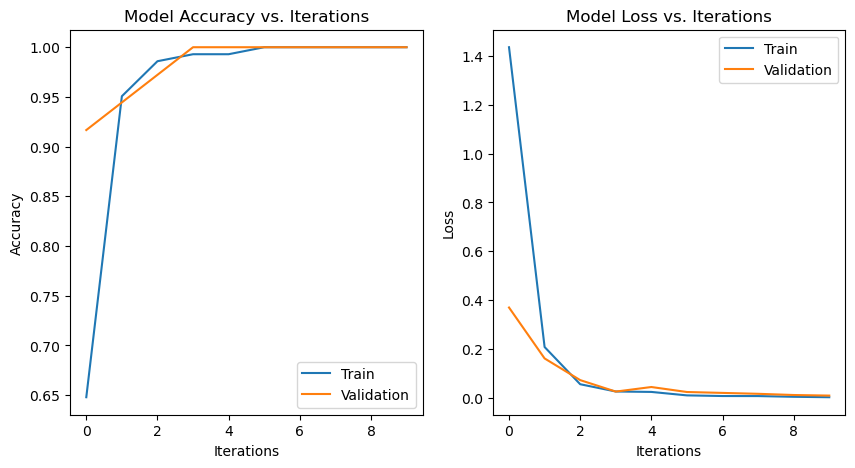

In [47]:
import matplotlib.pyplot as plt

figures, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(clf.history['accuracy'])
axes[0].plot(clf.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Iterations')
axes[0].legend(['Train', 'Validation'], loc='lower right')

axes[1].plot(clf.history['loss'])
axes[1].plot(clf.history['val_loss'])
axes[1].set_title('Model Loss vs. Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Iterations')
axes[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [48]:
print(ann.evaluate(X2_test, y2_test))

2/2 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 1.0000
[0.009560800157487392, 1.0]
